#Wine Quality Dataset

##Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Define Variables

In [10]:
# Define the highest and lowest quality values first
highest_quality = df["quality"].max()
lowest_quality = df["quality"].min()

# Average residual sugar for best and worst quality wines
best_quality_sugar = df[df["quality"] == highest_quality]["residual sugar"].mean()
worst_quality_sugar = df[df["quality"] == lowest_quality]["residual sugar"].mean()

# Print the results
print(f"Most frequent wine quality: {df['quality'].mode()[0]}")
print(f"Lowest quality score: {lowest_quality}")
print(f"Highest quality score: {highest_quality}")
print(f"Average residual sugar for best quality wine: {best_quality_sugar:.2f} g/L")
print(f"Average residual sugar for worst quality wine: {worst_quality_sugar:.2f} g/L")


Most frequent wine quality: 5
Lowest quality score: 3
Highest quality score: 8
Average residual sugar for best quality wine: 2.58 g/L
Average residual sugar for worst quality wine: 2.64 g/L


##1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

###To determine the most frequently occurring wine quality and find the minimum and maximum values in the quality column:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("wine_data.csv")  # Ensure the correct path

# Find the most frequent wine quality
most_frequent_quality = df["quality"].mode()[0]

# Find the min and max quality scores
min_quality = df["quality"].min()
max_quality = df["quality"].max()

print(f"Most frequent wine quality: {most_frequent_quality}")
print(f"Lowest quality score: {min_quality}")
print(f"Highest quality score: {max_quality}")


Most frequent wine quality: 5
Lowest quality score: 3
Highest quality score: 8


###Graph - Distribution of Wine Quality

<ipython-input-5-f8ed5069eb65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["quality"], palette="coolwarm")


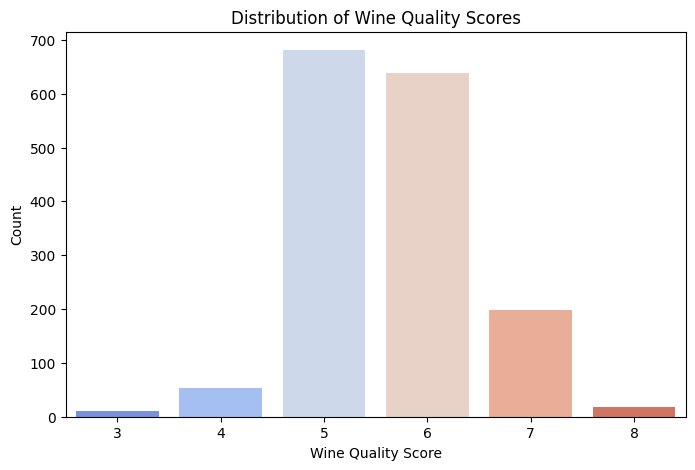

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["quality"], palette="coolwarm")
plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")
plt.show()


##2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

###To understand how these features relate to quality, we compute the Pearson correlation coefficient.

In [2]:
# Calculate correlation of selected features with quality
correlations = df.corr()["quality"][["fixed acidity", "alcohol", "free sulfur dioxide"]]

print("Correlation with wine quality:")
print(correlations)


Correlation with wine quality:
fixed acidity          0.124052
alcohol                0.476166
free sulfur dioxide   -0.050656
Name: quality, dtype: float64


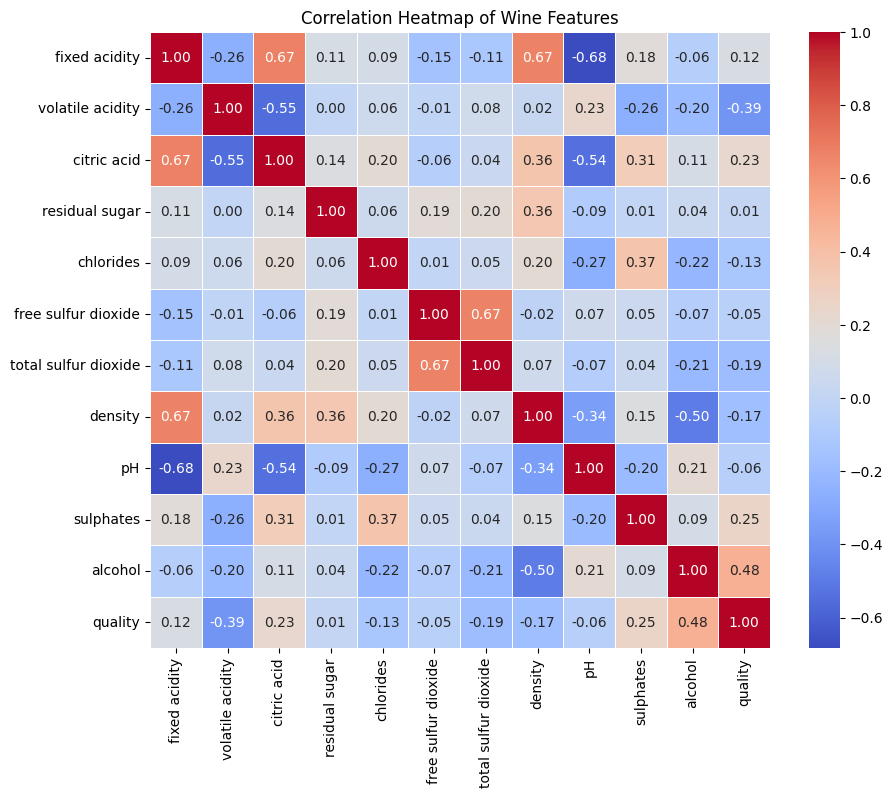

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wine Features")
plt.show()


### Alcohol vs. Quality

<ipython-input-7-55ef2af5dab5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=df, palette="coolwarm")


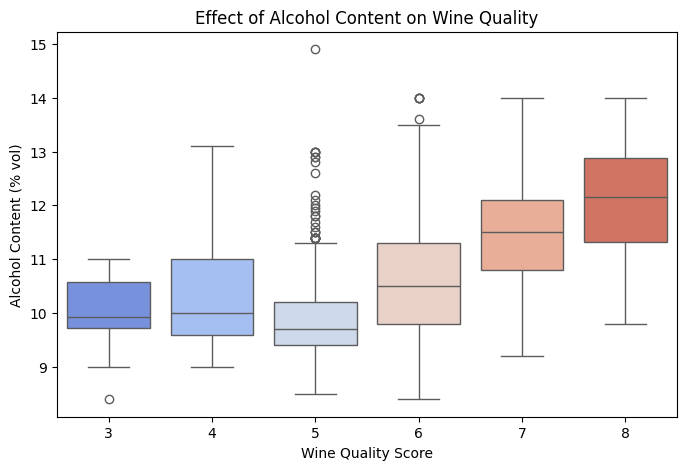

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="quality", y="alcohol", data=df, palette="coolwarm")
plt.xlabel("Wine Quality Score")
plt.ylabel("Alcohol Content (% vol)")
plt.title("Effect of Alcohol Content on Wine Quality")
plt.show()


### Free Sulfur Dioxide vs. Quality

<ipython-input-8-a4acc0cad025>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="free sulfur dioxide", data=df, palette="coolwarm")


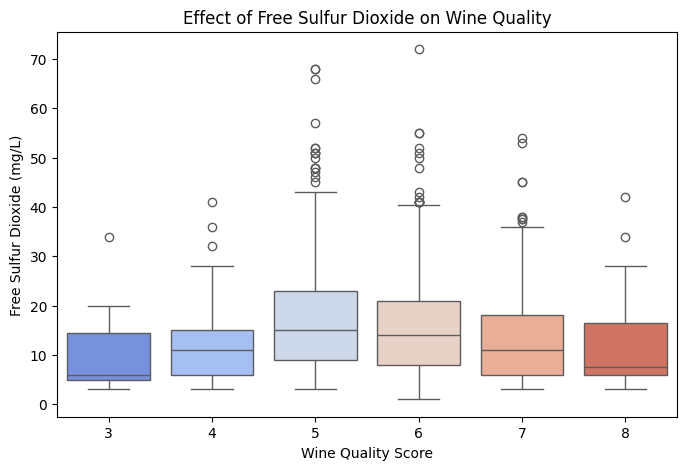

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="quality", y="free sulfur dioxide", data=df, palette="coolwarm")
plt.xlabel("Wine Quality Score")
plt.ylabel("Free Sulfur Dioxide (mg/L)")
plt.title("Effect of Free Sulfur Dioxide on Wine Quality")
plt.show()


##3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [11]:
# Average residual sugar for best and worst quality wines
best_quality_sugar = df[df["quality"] == highest_quality]["residual sugar"].mean()
worst_quality_sugar = df[df["quality"] == lowest_quality]["residual sugar"].mean()

# Print the results
print(f"Average residual sugar for best quality wine: {best_quality_sugar:.2f} g/L")
print(f"Average residual sugar for worst quality wine: {worst_quality_sugar:.2f} g/L")


Average residual sugar for best quality wine: 2.58 g/L
Average residual sugar for worst quality wine: 2.64 g/L


###Residual Sugar vs. Quality

<ipython-input-12-b116dc7edf7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["quality"], y=df["residual sugar"], palette="coolwarm")


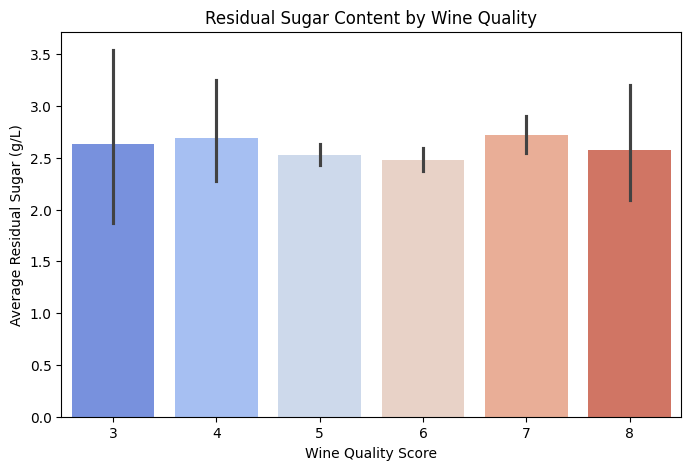

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["quality"], y=df["residual sugar"], palette="coolwarm")
plt.xlabel("Wine Quality Score")
plt.ylabel("Average Residual Sugar (g/L)")
plt.title("Residual Sugar Content by Wine Quality")
plt.show()


##Insight: No strong relationship between residual sugar and quality.

##4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

<ipython-input-13-c70696280659>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="quality", y="volatile acidity", data=df, palette="coolwarm")


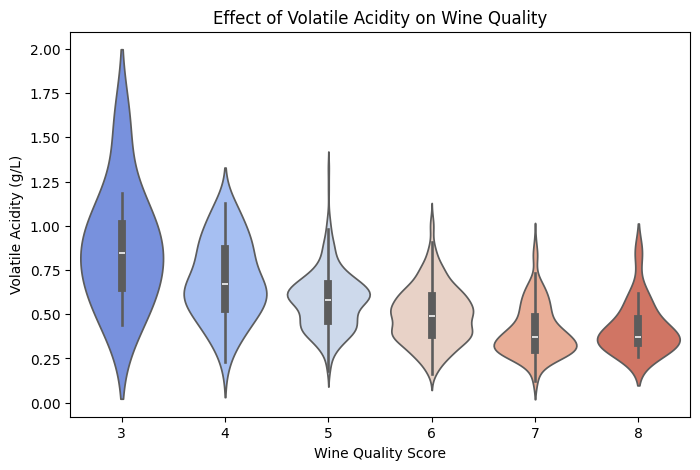

In [13]:
plt.figure(figsize=(8,5))
sns.violinplot(x="quality", y="volatile acidity", data=df, palette="coolwarm")
plt.xlabel("Wine Quality Score")
plt.ylabel("Volatile Acidity (g/L)")
plt.title("Effect of Volatile Acidity on Wine Quality")
plt.show()


###Insight: Higher volatile acidity is linked with lower wine quality.
(Lower acidity levels are preferred for better-quality wines.)

##5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare Data
X = df.drop(columns=["quality"])  # Features
y = df["quality"]  # Target variable

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print Accuracy Scores
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Decision Tree Accuracy: 0.5594
Random Forest Accuracy: 0.6594


###Feature Importance (Random Forest)

<ipython-input-15-9b13ec29b863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="coolwarm")


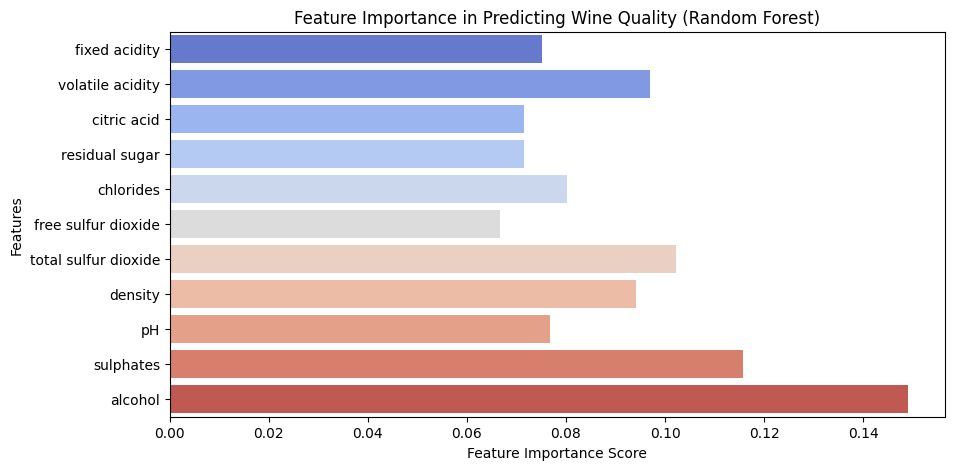

In [15]:
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance, y=feature_names, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting Wine Quality (Random Forest)")
plt.show()


### Insight: Alcohol is the most important feature for predicting wine quality.